## Data Preparation

In [ ]:
# Importing the libraries

import pandas as pd 
import numpy as np 

from sklearn.linear_model import LogisticRegression, Lasso, Ridge

import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read the breast cancer dataset
data = pd.read_csv('breast_cancer.csv')

#Explore the dataset
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# Checking for missing values

data.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# Dropping the ID Column 

data = data.drop(['id'], axis = 1)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
#check for duplicates
data.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [ ]:
# Use label encoder to encode the diagnosis
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() 

# What value is encoded as 0 and 1
print(data['diagnosis'].value_counts())

data['diagnosis'] = le.fit_transform(data['diagnosis'].values)
print(data['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64
diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
# Explain why we use mean + 3*sd and mean - 3*sd for outlier capping

with_outliers = []
without_outliers = []

for column in data.columns:
    mean = data[column].mean()
    sd = data[column].std()
    
    # Define the boundaries
    lower_bound = mean - 3*sd
    upper_bound = mean + 3*sd
    
    # # Find outliers
    outliers_below = data[column] < lower_bound
    outliers_above = data[column] > upper_bound

    #Replace outliers
   
    with_outliers_count = outliers_below.sum() + outliers_above.sum()
    with_outliers.append(column + " " + str(with_outliers_count))

    data[column][outliers_below] =  mean-3*sd
    data[column][outliers_above] =  mean+3*sd

    without_outliers_count = (data[column] < lower_bound).sum() + (data[column] > upper_bound).sum()
    without_outliers.append(column + " " + str(without_outliers_count))



print("With Outliers: ",with_outliers)
print("Without Outliers: ",without_outliers)

With Outliers:  ['diagnosis 0', 'radius_mean 5', 'texture_mean 4', 'perimeter_mean 7', 'area_mean 8', 'smoothness_mean 5', 'compactness_mean 9', 'concavity_mean 9', 'concave points_mean 6', 'symmetry_mean 5', 'fractal_dimension_mean 7', 'radius_se 7', 'texture_se 9', 'perimeter_se 8', 'area_se 6', 'smoothness_se 7', 'compactness_se 12', 'concavity_se 6', 'concave points_se 6', 'symmetry_se 11', 'fractal_dimension_se 10', 'radius_worst 6', 'texture_worst 4', 'perimeter_worst 6', 'area_worst 10', 'smoothness_worst 3', 'compactness_worst 10', 'concavity_worst 7', 'concave points_worst 0', 'symmetry_worst 9', 'fractal_dimension_worst 9']
Without Outliers:  ['diagnosis 0', 'radius_mean 0', 'texture_mean 0', 'perimeter_mean 0', 'area_mean 0', 'smoothness_mean 0', 'compactness_mean 0', 'concavity_mean 0', 'concave points_mean 0', 'symmetry_mean 0', 'fractal_dimension_mean 0', 'radius_se 0', 'texture_se 0', 'perimeter_se 0', 'area_se 0', 'smoothness_se 0', 'compactness_se 0', 'concavity_se 0',

In [ ]:
# split the data into train and test
from sklearn.model_selection import train_test_split

X= data.iloc[:,1:]
y= data.iloc[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=7)

print(X_train.shape)
print(X_test.shape)
print(y_train.value_counts())
print(y_test.value_counts())

(455, 30)
(114, 30)
diagnosis
0    285
1    170
Name: count, dtype: int64
diagnosis
0    72
1    42
Name: count, dtype: int64


In [ ]:
# scale the X data using normalization

from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()  

X_train_scaled = min_max.fit_transform(X_train)

X_test_scaled = min_max.fit_transform(X_test)

## Logistic Regression

In [ ]:
# Logistic Regression Model

from sklearn.linear_model import LogisticRegression

# Since the dataset is small (400 rows), we will use liblinear solver

model_lr = LogisticRegression(solver='liblinear')

model_lr.fit(X_train_scaled, y_train)

print('Coefficients of the model for all features:', model_lr.coef_)
print('Intercept of the model:', model_lr.intercept_)

Coefficients of the model for all features: [[ 0.22129705  0.65168361  0.31904621  0.82678757 -0.46269784  0.53993584
   1.99079212  2.25581884 -0.53227693 -1.40784758  1.31085591 -0.73350446
   0.97557748  1.4199591  -0.61788813 -0.76924228 -0.1244773  -0.33683228
  -0.33579755 -0.58184473  1.12434648  1.15047105  1.07198429  1.55192887
   0.49605717  0.79935912  1.4468607   1.80570811  0.86805247  0.37179692]]
Intercept of the model: [-5.24027144]


In [ ]:
#Predicting the Malignant (1) or Benign (0)

predict = model_lr.predict(X_test_scaled)
print(predict)

#Predicting the probability it is Malignant (P(x)) or Benign (1-P(x))
predict_prob = model_lr.predict_proba(X_test_scaled)
print(predict_prob)

[0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0
 0 1 0]
[[9.81049497e-01 1.89505033e-02]
 [4.57867592e-01 5.42132408e-01]
 [2.58808663e-01 7.41191337e-01]
 [5.47153643e-01 4.52846357e-01]
 [2.18587916e-01 7.81412084e-01]
 [1.76817080e-01 8.23182920e-01]
 [6.32690065e-01 3.67309935e-01]
 [5.42390842e-03 9.94576092e-01]
 [9.95284174e-01 4.71582584e-03]
 [6.26433631e-01 3.73566369e-01]
 [6.09483270e-03 9.93905167e-01]
 [8.85535456e-01 1.14464544e-01]
 [8.75653809e-01 1.24346191e-01]
 [9.61777779e-01 3.82222211e-02]
 [9.99807946e-04 9.99000192e-01]
 [8.72196255e-01 1.27803745e-01]
 [9.52882654e-01 4.71173463e-02]
 [4.65811894e-01 5.34188106e-01]
 [9.48428807e-01 5.15711933e-02]
 [9.75022339e-01 2.49776606e-02]
 [1.60036408e-03 9.98399636e-01]
 [1.57986491e-02 9.84201351e-01]
 [9.44409986e-01 5.55900140e-02]
 [2.4736

0.9298245614035088
[[71  1]
 [ 7 35]]


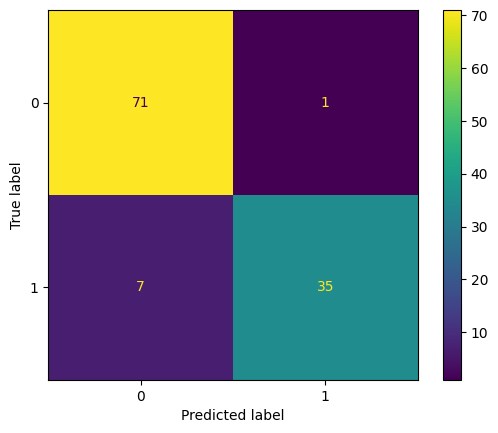

In [ ]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, predict))

matrix = metrics.confusion_matrix(y_test, predict)
print(matrix)

# Row 1, Column 1 = How much of the Benign(0) were correctly predicted
# Row 2, Column 2 = How much of the Malignant(1) were correctly predicted
# Row 1, Column 2 = How much of the Benign(0) were incorrectly predicted as Malignant(1)
# Row 2, Column 1 = How much of the Malignant(1) were incorrectly predicted as Benign(0)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

In [ ]:
print(metrics.classification_report(y_test, predict))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95        72
           1       0.97      0.83      0.90        42

    accuracy                           0.93       114
   macro avg       0.94      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



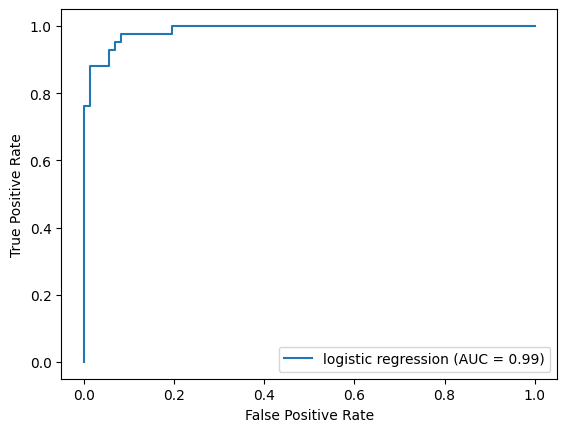

In [ ]:
#AUC Curve

fpr, tpr, thresholds = metrics.roc_curve(y_test, predict_prob[:,1]) 
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, 
estimator_name='logistic regression')
display.plot()

### Logistic Regression with Bootstrapping

In [ ]:
from sklearn.utils import resample

accuracy = []
predictions = []

n_iterations = 1000

for i in range(n_iterations):
    X_sparse, y_sparse = resample(X_train_scaled, y_train, replace=True, random_state=7)

    model = LogisticRegression(solver='liblinear')
    model.fit(X_sparse, y_sparse)

    predict = model.predict(X_test_scaled)
    predictions.append(predict)
    
    accuracy.append(metrics.accuracy_score(y_test, predict))


In [ ]:
from sklearn.metrics import mean_squared_error

print('Mean Accuracy of Bootstrapped Samples:', np.mean(accuracy))

mean_predictions = np.mean(predictions, axis=0)
mse = mean_squared_error(y_test, mean_predictions > 0.5)
print('Mean Squared Error of Bootstrapped Samples:', mse)

Mean Accuracy of Bootstrapped Samples: 0.9385964912280702
Mean Squared Error of Bootstrapped Samples: 0.06140350877192982


## Logistic Regression using RFE

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_num_features = None
best_model = None

# Iterate over different numbers of features
for num_features in range(1, len(X_train.columns) + 1):
    # Create a logistic regression model
    model = LogisticRegression()
    # Create the RFE model and select num_features
    rfe = RFE(model, n_features_to_select=num_features)
    rfe.fit(X_train_scaled, y_train)
    # Transform the data to include only the selected features
    X_train_selected = rfe.transform(X_train_scaled)
    X_test_selected = rfe.transform(X_test_scaled)
    # Train the model on the selected features
    model.fit(X_train_selected, y_train)
    # Make predictions on the test set
    y_pred = model.predict(X_test_selected)
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    # Update best accuracy and number of features if the current model is better
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_num_features = num_features
        best_model = model

print("Best Number of Features:", best_num_features)
print("Test Accuracy:", best_accuracy)

Best Number of Features: 6
Test Accuracy: 0.9385964912280702


### Logistic Regression Using Lasso

In [ ]:
#Lasso Method 

from sklearn.linear_model import Lasso, Ridge

lasso_model = LogisticRegression(penalty='l1', solver='liblinear')
lasso_model.fit(X_train_scaled, y_train)
lasso_predict = lasso_model.predict(X_test_scaled)
print(metrics.accuracy_score(lasso_predict, y_test))

0.9385964912280702


[[72  0]
 [ 7 35]]


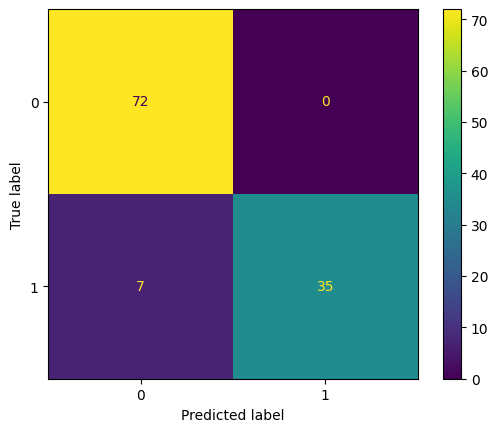

In [ ]:
matrix = metrics.confusion_matrix(y_test, lasso_predict)
print(matrix)

# Row 1, Column 1 = True Negative = How much of the Benign(0) were correctly predicted
# Row 2, Column 2 = True Positive = How much of the Malignant(1) were correctly predicted
# Row 1, Column 2 = False Positive = How much of the Benign(0) were incorrectly predicted as Malignant(1)
# Row 2, Column 1 = False Negative = How much of the Malignant(1) were incorrectly predicted as Benign(0)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix)
disp.plot()

# Through confusion matrix, we can see that the model is not good at predicting the Malignant(1)
# Able to classify the Benign(0) more accurately using Lasso

In [ ]:
print(metrics.classification_report(y_test, lasso_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        72
           1       1.00      0.83      0.91        42

    accuracy                           0.94       114
   macro avg       0.96      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
print('Coefficients of the model for all features:', lasso_model.coef_)

Coefficients of the model for all features: [[ 0.          0.          0.          0.          0.          0.
   0.          4.75333253  0.          0.          0.0301016   0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          3.31842852  0.         12.82964525
   0.          0.          0.80364473  4.51746044  1.30394737  0.        ]]


In [ ]:
coefficents = lasso_model.coef_
coefficents = pd.DataFrame(coefficents.T, index=X.columns, columns=['Coefficient'])
removed_features = coefficents[coefficents['Coefficient'] == 0]
print(removed_features)

                         Coefficient
radius_mean                      0.0
texture_mean                     0.0
perimeter_mean                   0.0
area_mean                        0.0
smoothness_mean                  0.0
compactness_mean                 0.0
concavity_mean                   0.0
symmetry_mean                    0.0
fractal_dimension_mean           0.0
texture_se                       0.0
perimeter_se                     0.0
area_se                          0.0
smoothness_se                    0.0
compactness_se                   0.0
concavity_se                     0.0
concave points_se                0.0
symmetry_se                      0.0
fractal_dimension_se             0.0
radius_worst                     0.0
perimeter_worst                  0.0
smoothness_worst                 0.0
compactness_worst                0.0
fractal_dimension_worst          0.0


In [ ]:
mse_test = metrics.mean_squared_error(y_test, lasso_predict)
print('Mean squared error testing set:', mse_test)

mse_train = metrics.mean_squared_error(y_train, lasso_model.predict(X_train_scaled))
print('Mean squared error training set:', mse_train)

Mean squared error testing set: 0.06140350877192982
Mean squared error training set: 0.017582417582417582


### Role of Alpha for Lasso Method

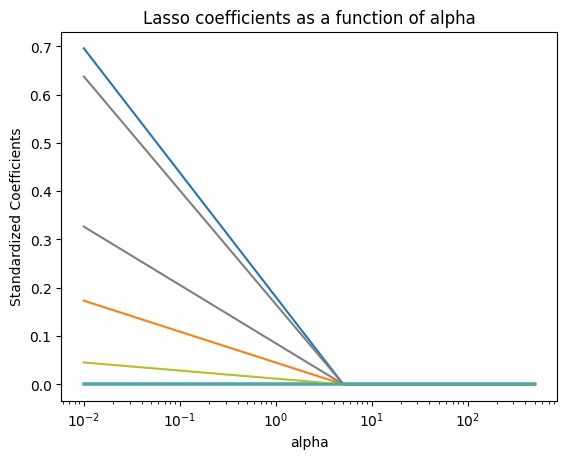

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt

alphas = np.linspace(0.01, 500, 100)

lasso = Lasso(max_iter=10000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_scaled, y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Standardized Coefficients')
plt.title('Lasso coefficients as a function of alpha')
plt.show()

### Optimal Alpha using k-fold cross validation

In [ ]:
from sklearn.linear_model import LassoCV
lasso = LassoCV(cv=10, random_state=0, max_iter=10000)
lasso.fit(X_train_scaled, y_train)
print("Best alpha using built-in LassoCV: %f" % lasso.alpha_)

Best alpha using built-in LassoCV: 0.000330


In [ ]:
lasso_best = Lasso(alpha=lasso.alpha_)
lasso_best.fit(X_train_scaled, y_train)
lasso_best_predict = lasso_best.predict(X_test_scaled)

In [ ]:
mse_test = metrics.mean_squared_error(y_test, lasso_best_predict)
print('Mean squared error testing set:', mse_test)

mse_train = metrics.mean_squared_error(y_train, lasso_best.predict(X_train_scaled))
print('Mean squared error training set:', mse_train)

Mean squared error testing set: 0.07321861900639719
Mean squared error training set: 0.053130689682923865


[[71  1]
 [ 7 35]]


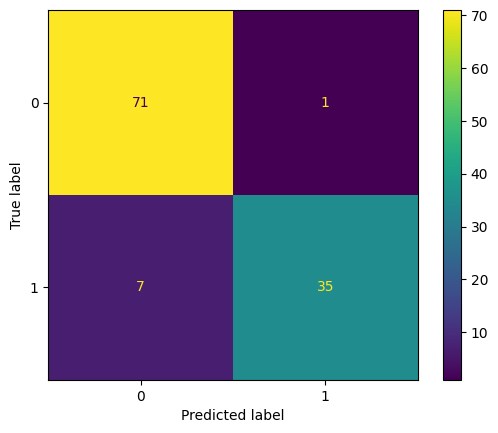

In [ ]:
lasso_best_predict_class = (lasso_best_predict > 0.5).astype(int)
matrix_best = metrics.confusion_matrix(y_test, lasso_best_predict_class)
print(matrix_best)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=matrix_best)
disp.plot()

# Logistic Regression with Ridge

Fit the ridge regression model

In [ ]:
from sklearn.linear_model import Ridge, LogisticRegression


for v in [0.0001, 10]:
      print(f"C is set to {v}")
      ridge_model = LogisticRegression(penalty='l2', C=v, solver='liblinear')
      ridge_model.fit(X_train_scaled, y_train)
      ridge_predict = ridge_model.predict(X_test_scaled)
      print('Accuracy is', metrics.accuracy_score(ridge_predict, y_test))

      coef = pd.DataFrame()
      coef['feature_name'] = X_train.columns
      coef['coefficients'] = pd.Series(ridge_model.coef_.reshape(X_train_scaled.shape[1], ))
      print(coef)

C is set to 0.0001
Accuracy is 0.7631578947368421
               feature_name  coefficients
0               radius_mean      0.000913
1              texture_mean     -0.000735
2            perimeter_mean      0.001016
3                 area_mean      0.001612
4           smoothness_mean     -0.001559
5          compactness_mean      0.000770
6            concavity_mean      0.002170
7       concave points_mean      0.002291
8             symmetry_mean     -0.001496
9    fractal_dimension_mean     -0.002307
10                radius_se      0.001426
11               texture_se     -0.002070
12             perimeter_se      0.001361
13                  area_se      0.001892
14            smoothness_se     -0.002526
15           compactness_se     -0.000302
16             concavity_se      0.000077
17        concave points_se     -0.000452
18              symmetry_se     -0.001873
19     fractal_dimension_se     -0.001004
20             radius_worst      0.001573
21            texture_wors

Ridge's confusion matrix

[[72  0]
 [ 6 36]]


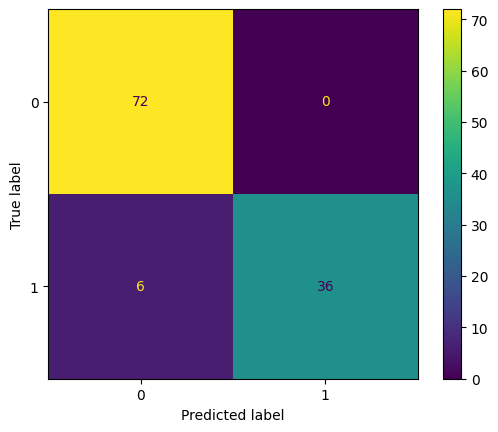

In [ ]:
ridge_matrix = metrics.confusion_matrix(y_test, ridge_predict)
print(ridge_matrix)

# Row 1, Column 1 = True Negative = How much of the Benign(0) were correctly predicted
# Row 2, Column 2 = True Positive = How much of the Malignant(1) were correctly predicted
# Row 1, Column 2 = False Positive = How much of the Benign(0) were incorrectly predicted as Malignant(1)
# Row 2, Column 1 = False Negative = How much of the Malignant(1) were incorrectly predicted as Benign(0)

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=ridge_matrix)
disp.plot()

Precision, Recall, & F1-score metrics

In [ ]:
print(metrics.classification_report(y_test, ridge_predict))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        72
           1       1.00      0.86      0.92        42

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



All feature coefficients

In [ ]:
print('Coefficients of the model for all features:', ridge_model.coef_)

Coefficients of the model for all features: [[ 7.93463723e-04  1.77470543e+00  1.79749986e-01  1.36842026e+00
  -5.65439408e-01 -6.19535024e-02  3.55527439e+00  4.64233712e+00
  -1.05252536e+00 -2.48986147e+00  2.91662825e+00 -1.37569646e+00
   1.59461727e+00  3.25186899e+00 -4.65949182e-02 -3.09121174e+00
   3.40778848e-01 -3.74515436e-02 -2.55984540e-01 -7.35808587e-01
   2.61364672e+00  3.25249433e+00  2.18673018e+00  3.53363904e+00
   1.74077036e+00  4.02510621e-01  2.13246594e+00  3.44470436e+00
   2.52189831e+00  1.31136784e+00]]


Features with small coefficients

In [ ]:
# Assuming coef is the DataFrame containing the coefficients
threshold = 0.1
unimportant_features = coef[abs(coef['coefficients']) < threshold]['feature_name']
print("Unimportant Features:")
print(unimportant_features)

Unimportant Features:
0           radius_mean
5      compactness_mean
14        smoothness_se
17    concave points_se
Name: feature_name, dtype: object


In [ ]:
ridge_mse_test = metrics.mean_squared_error(y_test, ridge_predict)
print('Mean squared error testing set:', ridge_mse_test)

ridge_mse_train = metrics.mean_squared_error(y_train,ridge_model.predict(X_train_scaled))
print('Mean squared error training set:', ridge_mse_train)

Mean squared error testing set: 0.05263157894736842
Mean squared error training set: 0.013186813186813187


# Comparison of Lasso and Ridge

In [ ]:
accuracy = {'lasso':[], 'ridge':[], 'C':[]}

for v in np.arange(1, 0.1, -0.1):
    las = LogisticRegression(penalty='l1', C=v, solver='liblinear')
    rid = LogisticRegression(penalty='l2', C=v, solver='liblinear')
    las.fit(X_train_scaled, y_train)
    rid.fit(X_train_scaled, y_train)
    predict_las = las.predict(X_test_scaled)
    predict_rid = rid.predict(X_test_scaled)
    
    accuracy['lasso'].append(metrics.accuracy_score(predict, predict_las))
    accuracy['ridge'].append(metrics.accuracy_score(predict, predict_rid))
    accuracy['C'].append(v)

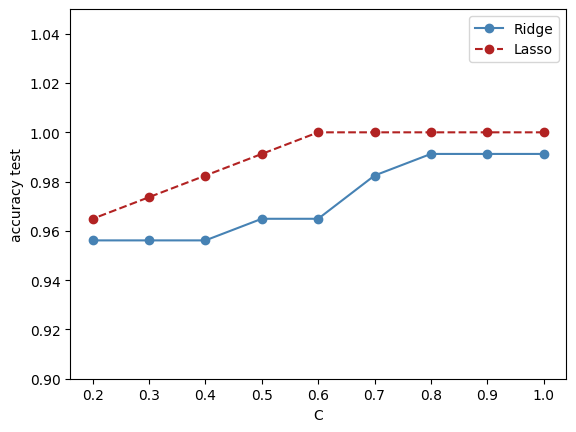

In [ ]:
plt.plot(accuracy['C'], accuracy['ridge'], 
         marker='o', color='steelblue', label='Ridge')
plt.plot(accuracy['C'], accuracy['lasso'], 
         marker='o', linestyle='--', color='firebrick', label='Lasso')
plt.legend()
plt.xlabel('C')
plt.ylabel('accuracy test')
plt.ylim(0.9,1.05)
plt.show()

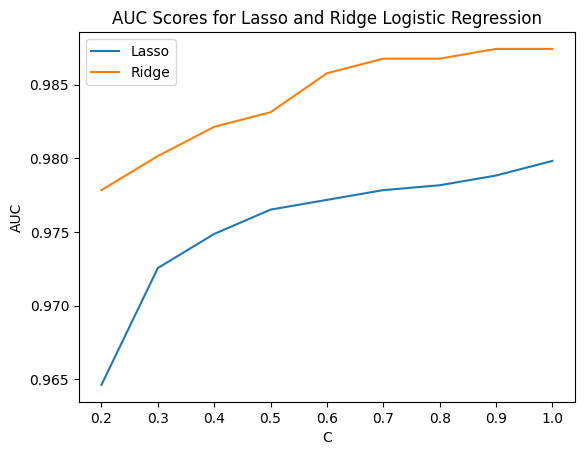

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

# Your code for computing AUC scores
auc_scores = {'lasso': [], 'ridge': [], 'C': []}

for v in np.arange(1, 0.1, -0.1):
    las = LogisticRegression(penalty='l1', C=v, solver='liblinear')
    rid = LogisticRegression(penalty='l2', C=v, solver='liblinear')
    las.fit(X_train_scaled, y_train)
    rid.fit(X_train_scaled, y_train)
    predict_proba_las = las.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
    predict_proba_rid = rid.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1
    
    auc_scores['lasso'].append(roc_auc_score(y_test, predict_proba_las))
    auc_scores['ridge'].append(roc_auc_score(y_test, predict_proba_rid))
    auc_scores['C'].append(v)

# Plotting the AUC scores
plt.plot(auc_scores['C'], auc_scores['lasso'], label='Lasso')
plt.plot(auc_scores['C'], auc_scores['ridge'], label='Ridge')
plt.xlabel('C')
plt.ylabel('AUC')
plt.title('AUC Scores for Lasso and Ridge Logistic Regression')
plt.legend()
plt.show()


# Decision Trees

a. Ensemble Methods

In [ ]:
# TO DO:
# solve for MSE
# solve for MSE error
# add the bias and variance chart
# determine accuracy error

# Import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


# Create and fit the Gradient Boosting Classifier
model_gb = GradientBoostingClassifier(n_estimators=30, learning_rate=0.01, max_depth=5, random_state=156)
model_gb.fit(X_train_scaled, y_train)

# Evaluate the model
preds_gb = model_gb.predict(X_test_scaled)
accuracy_gb = accuracy_score(y_test, preds_gb)
print('Gradient boosting model yields test accuracy:', accuracy_gb)

# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

gbr = GradientBoostingClassifier(random_state=156)

params = {
    'max_depth': np.arange(5, 30, 5),
    'n_estimators': np.arange(50, 210, 50),
    'learning_rate': np.arange(0.01, 0.31, 0.1)
}

grid_search = GridSearchCV(estimator=gbr, param_grid=params, cv=5, n_jobs=-1, verbose=1, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train_scaled, y_train)

# Get the best estimator and show parameters
best_params_gb = grid_search.best_params_
print('Best Parameters:', best_params_gb)

# Evaluate the tuned model
clf_best_gb = grid_search.best_estimator_
y_test_pred_gb = clf_best_gb.predict(X_test_scaled)

accuracy_tuned_gb = accuracy_score(y_test, y_test_pred_gb)
print('Hyperparameter tuning of the gradient boosting model yields test accuracy:', accuracy_tuned_gb)


Gradient boosting model yields test accuracy: 0.9298245614035088
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 50}
Hyperparameter tuning of the gradient boosting model yields test accuracy: 0.9035087719298246


Accuracy: 0.9298245614035088
              precision    recall  f1-score   support

           0       0.96      0.93      0.94        72
           1       0.89      0.93      0.91        42

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114

Confusion Matrix:
[[67  5]
 [ 3 39]]


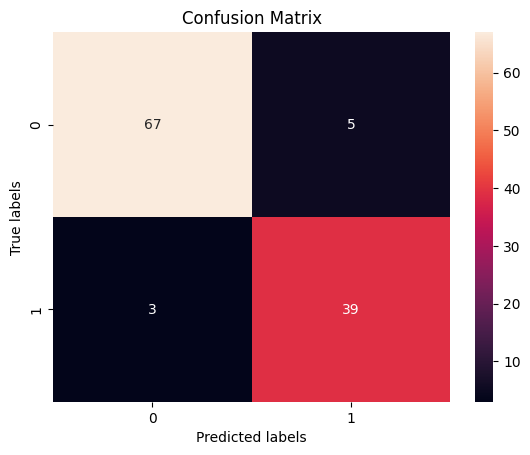

In [ ]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the model
dt_classifier.fit(X_train_scaled, y_train)

# Predictions on the test set
y_pred = dt_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot confusion matrix
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


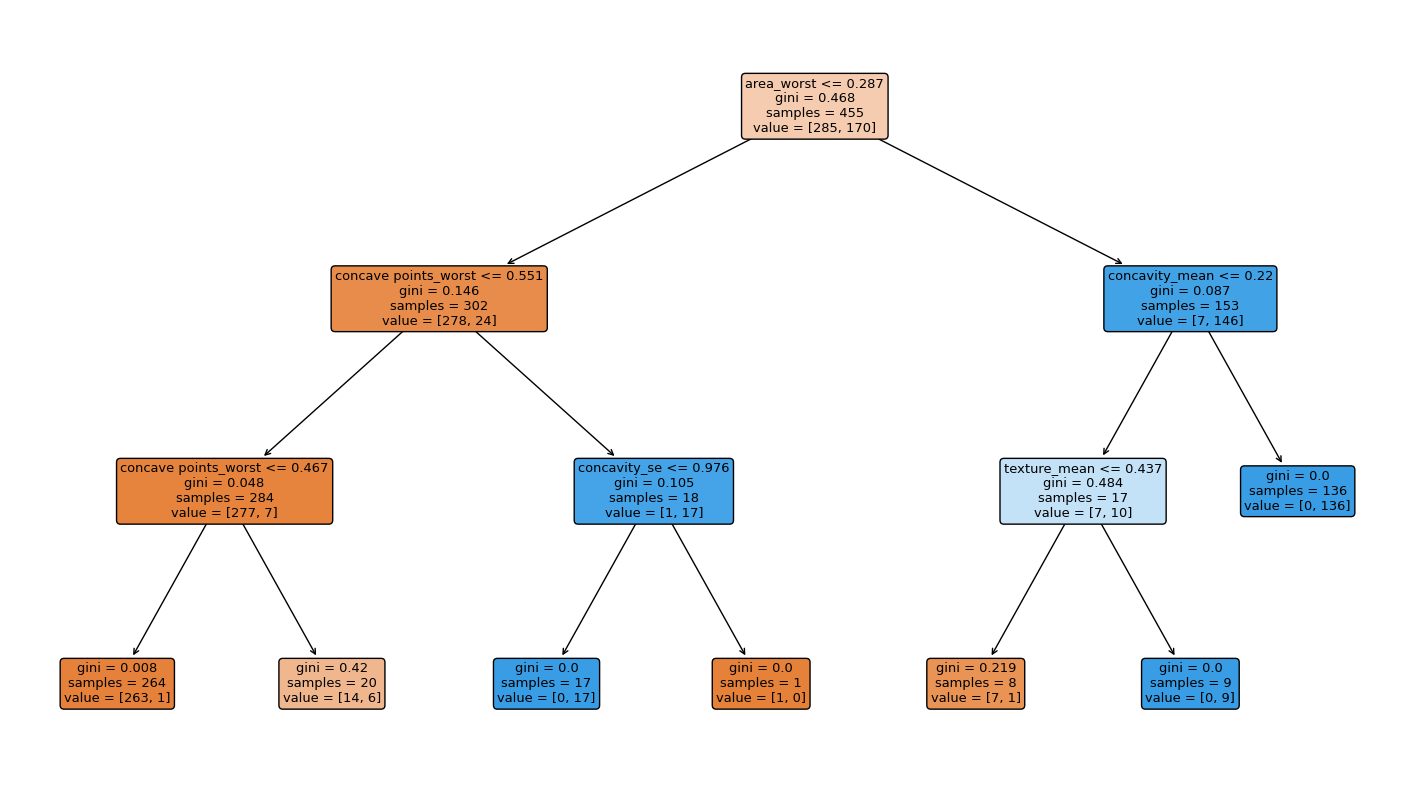

In [ ]:
# Import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create and fit the Decision Tree Classifier
model = DecisionTreeClassifier(max_depth=3, random_state=156)
model.fit(X_train_scaled, y_train)

# Plot the Decision Tree
plt.figure(figsize=(18,10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()



Feature Importance:
radius_mean: 0.0
texture_mean: 0.032293323805452336
perimeter_mean: 0.0
area_mean: 0.0
smoothness_mean: 0.0
compactness_mean: 0.0
concavity_mean: 0.025515712636406753
concave points_mean: 0.0
symmetry_mean: 0.0
fractal_dimension_mean: 0.0
radius_se: 0.0
texture_se: 0.0
perimeter_se: 0.0
area_se: 0.0
smoothness_se: 0.0
compactness_se: 0.0
concavity_se: 0.009405664479491791
concave points_se: 0.0
symmetry_se: 0.0
fractal_dimension_se: 0.0
radius_worst: 0.0
texture_worst: 0.0
perimeter_worst: 0.0
area_worst: 0.7739197221213291
smoothness_worst: 0.0
compactness_worst: 0.0
concavity_worst: 0.0
concave points_worst: 0.15886557695732012
symmetry_worst: 0.0
fractal_dimension_worst: 0.0


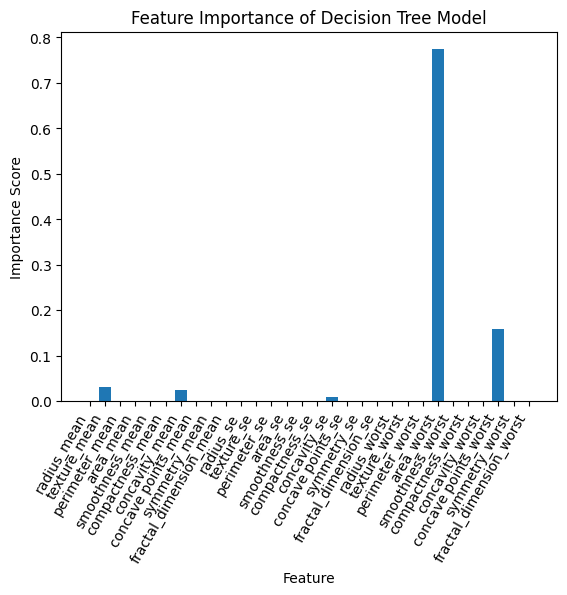

In [ ]:
# Check Feature Importance
fi = model.feature_importances_
importance_dict = dict(zip(X.columns, fi))

print("Feature Importance:")
for feature, importance in importance_dict.items():
    print(f"{feature}: {importance}")

plt.bar(range(len(fi)), fi, tick_label=X.columns)
plt.xlabel('Feature')
plt.xticks(rotation=60, ha='right')
plt.ylabel('Importance Score')
plt.title('Feature Importance of Decision Tree Model')
plt.show()


In [ ]:
# Evaluate Model Performance
preds = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, preds)
print("Test Accuracy:", accuracy)

# Find Maximum Test Accuracy
accuracies = {'max_depth':[], 'train_acc':[], 'test_acc':[]}
for depth in range(1, 30):
    model = DecisionTreeClassifier(max_depth=depth, random_state=156)
    model.fit(X_train_scaled, y_train)
    train_preds = model.predict(X_train_scaled)
    test_preds = model.predict(X_test_scaled)
    train_acc = accuracy_score(y_train, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    accuracies['max_depth'].append(depth)
    accuracies['train_acc'].append(train_acc)
    accuracies['test_acc'].append(test_acc)

best_depth_idx = np.argmax(accuracies['test_acc'])
best_depth = accuracies['max_depth'][best_depth_idx]
best_test_accuracy = accuracies['test_acc'][best_depth_idx]

print("Depth of the model yielding maximum test accuracy:", best_depth)
print("Optimized model test accuracy:", best_test_accuracy)

Test Accuracy: 0.9035087719298246
Depth of the model yielding maximum test accuracy: 4
Optimized model test accuracy: 0.9210526315789473


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e2ba32df-4aa7-41f3-88ee-6f78f0f6d42c' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>